In [151]:
import numpy as np
import pandas as pd
import seaborn as sns

# Database use of this section 
titanic = sns.load_dataset('titanic')

In [152]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [26]:
titanic.query('survived == 1 & sex == "male"').count() / titanic.count() 

survived       0.122334
pclass         0.122334
sex            0.122334
age            0.130252
sibsp          0.122334
parch          0.122334
fare           0.122334
embarked       0.122610
class          0.122334
who            0.122334
adult_male     0.122334
deck           0.221675
embark_town    0.122610
alive          0.122334
alone          0.122334
dtype: float64

In [24]:
#  pivot tables can be specified with multiple levels
# using pd.cut to get age intervals
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

## Clean data

In [154]:
titanic.isnull().any()

survived       False
pclass         False
sex            False
age             True
sibsp          False
parch          False
fare           False
embarked        True
class          False
who            False
adult_male     False
deck            True
embark_town     True
alive          False
alone          False
dtype: bool

In [155]:
titanic = titanic.dropna(axis=0, how='any')
titanic.isnull().any()

survived       False
pclass         False
sex            False
age            False
sibsp          False
parch          False
fare           False
embarked       False
class          False
who            False
adult_male     False
deck           False
embark_town    False
alive          False
alone          False
dtype: bool

Check if perhaps better to use fillna later!

## Display quick information about dataset

In [25]:
# using pd.qcut to automatically compute quantiles
fare = pd.qcut(titanic['fare'], 2)
# Sex and age use as multi Index
# Fare pair and class use as columns
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

Seems class, age and sex are great features. Later we will take look at all correlation between these variables.

In [157]:
from sklearn.feature_extraction import DictVectorizer
from sklearn import preprocessing

# Split DATA
# drop species target array for features matrix

clean_titanic = titanic.drop(['alive', 'who', 'class', 'deck'], axis=1)

# target Array
y_titanic = clean_titanic['survived']

# then drop survided col
X_titanic = clean_titanic.drop(['survived'], axis=1)

print(X_titanic.head())

vec = DictVectorizer(sparse=True, dtype=int)
X_titanic = vec.fit_transform(X_titanic.T.to_dict().values())
print(X_titanic.shape)

X_titanic = pd.DataFrame(X_titanic.toarray())

    pclass     sex   age  sibsp  parch     fare embarked  adult_male  \
1        1  female  38.0      1      0  71.2833        C       False   
3        1  female  35.0      1      0  53.1000        S       False   
6        1    male  54.0      0      0  51.8625        S        True   
10       3  female   4.0      1      1  16.7000        S       False   
11       1  female  58.0      0      0  26.5500        S       False   

    embark_town  alone  
1     Cherbourg  False  
3   Southampton  False  
6   Southampton   True  
10  Southampton  False  
11  Southampton   True  
(182, 15)


## Identify correlations between data

/Users/jeromebuisine/.pyenv/versions/tensorflow/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


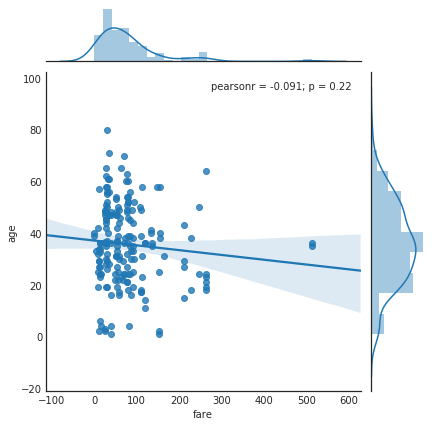

In [169]:
from matplotlib import pyplot as plt
plt.style.context('ggplot')

with sns.axes_style('white'):
    sns.jointplot("fare", "age", clean_titanic, kind='reg')

Coefficient of correlation is very low, furthermore, p-value is > 5%.

/Users/jeromebuisine/.pyenv/versions/tensorflow/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


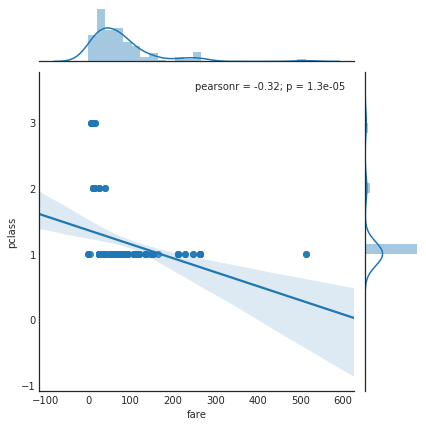

In [170]:
with sns.axes_style('white'):
    sns.jointplot("fare", "pclass", clean_titanic, kind='reg')

pclass and fare seem to be significative. Little correlation is present, furthermore, p-value is < 5%.


Let's now take a look at data 'survived' which is the data we want to explain.

    survived  pclass     sex   age  sibsp  parch     fare embarked  \
1          1       1  female  38.0      1      0  71.2833        C   
3          1       1  female  35.0      1      0  53.1000        S   
6          0       1    male  54.0      0      0  51.8625        S   
10         1       3  female   4.0      1      1  16.7000        S   
11         1       1  female  58.0      0      0  26.5500        S   

    adult_male  embark_town  alone       PCA1       PCA2  
1        False    Cherbourg  False  -7.550224   2.243071  
3        False  Southampton  False -25.494028  -1.120790  
6         True  Southampton   True -27.870430  17.863915  
10       False  Southampton  False -61.882934 -32.862200  
11       False  Southampton   True -52.940660  21.352774  


/Users/jeromebuisine/.pyenv/versions/tensorflow/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


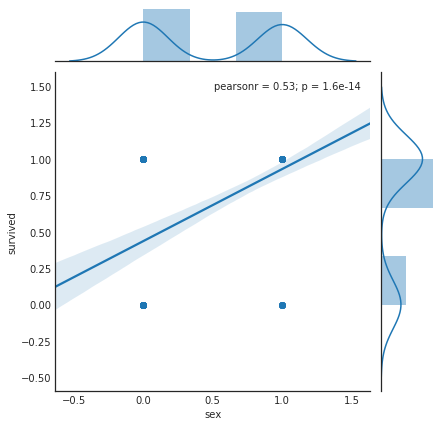

In [178]:
cp_clean_titanic = clean_titanic.copy()

cp_clean_titanic['sex'] = cp_clean_titanic['sex'].map({'female': 1, 'male': 0})

with sns.axes_style('white'):
    sns.jointplot("sex", "survived", cp_clean_titanic, kind='reg')

/Users/jeromebuisine/.pyenv/versions/tensorflow/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


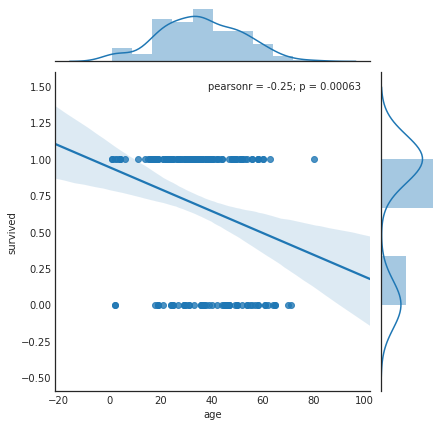

In [179]:
cp_clean_titanic = clean_titanic.copy()

cp_clean_titanic['sex'] = cp_clean_titanic['sex'].map({'female': 1, 'male': 0})

with sns.axes_style('white'):
    sns.jointplot("age", "survived", cp_clean_titanic, kind='reg')

/Users/jeromebuisine/.pyenv/versions/tensorflow/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


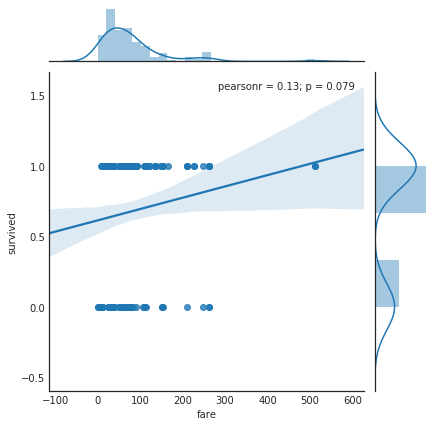

In [182]:
cp_clean_titanic = clean_titanic.copy()

cp_clean_titanic['sex'] = cp_clean_titanic['sex'].map({'female': 1, 'male': 0})

with sns.axes_style('white'):
    sns.jointplot("fare", "survived", cp_clean_titanic, kind='reg')

With information obtained with these correlation, let's try using Logistic Regression.

## Logistic Regression

In [183]:
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_titanic, y_titanic, test_size=0.3, random_state=0)

from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/Users/jeromebuisine/.pyenv/versions/tensorflow/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [184]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.82


In [ ]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(logreg, X_titanic, y_titanic, cv=5)
print('Accuracy of Gaussian Naive Bayesian classification with cross validation: {:.2f}'.format(scores.mean()))

82% is correct but we can do better! Perhaps change kernel approximation

## Naive Bayesian classification

### Gaussian Naive Bayesian classification

In [191]:
from sklearn.naive_bayes import GaussianNB
g_model = GaussianNB()
g_model.fit(X_train, y_train);

In [192]:
print('Accuracy of Gaussian Naive Bayesian classification on test set: {:.2f}'.format(g_model.score(X_test, y_test)))

Accuracy of Gaussian Naive Bayesian classification on test set: 0.69


In [194]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(g_model, X_titanic, y_titanic, cv=5)
print('Accuracy of Gaussian Naive Bayesian classification with cross validation: {:.2f}'.format(scores.mean()))

Accuracy of Gaussian Naive Bayesian classification with cross validation: 0.74


### Multinomial Naive Bayesian classification

In [187]:
from sklearn.naive_bayes import MultinomialNB
m_model = MultinomialNB()
m_model.fit(X_train, y_train);
print('Accuracy of Multinomial Naive Bayesian classification on test set: {:.2f}'.format(m_model.score(X_test, y_test)))

Accuracy of Multinomial Naive Bayesian classification on test set: 0.64


In [190]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(m_model, X_titanic, y_titanic, cv=5)
print('Accuracy of Multinomial Naive Bayesian classification with cross validation: {:.2f}'.format(scores.mean()))

Accuracy of Multinomial Naive Bayesian classification with cross validation: 0.62


In [ ]:
Globally, Naive Bayesian seems to not be the best model (perhaps parameters ?).

## Try using PCA which is a fast linear dimensionality reduction technique

In [158]:
# Try separate data using PCA
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
model.fit(X_titanic)                      # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X_titanic)         # 4. Transform the data to two dimensions

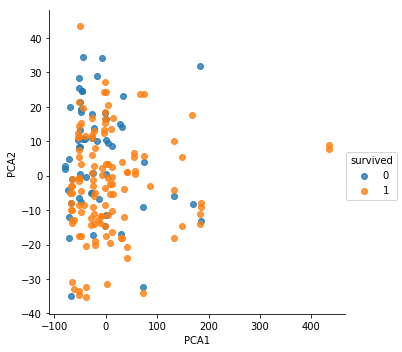

In [159]:
# let's plot result
clean_titanic['PCA1'] = X_2D[:, 0]
clean_titanic['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='survived', data=clean_titanic, fit_reg=False);

PCA seems to not be the great model for this problem. Later we will try improve PCA performance by changing features selected. Then, try using logistic regression on that.